**ASSIGNMENT 3**

Name - Tejaswini Sengaonkar 

UPI Id - tsen057  

Student ID - 507880432

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.sparse import csr_matrix,lil_matrix
import time

**Task 1: Implementation of Power Iteration Algorithm.**

(A) Implement the power iteration algorithm in matrix form to calculate the rank vector r, without teleport, using the PageRank formulation.

In [19]:
def power_iteration_pagerank(M, max_iterations=1000, ep=0.02):
    node_count = M.shape[0]
    r = np.ones(node_count) / node_count

    for iter_num in range(max_iterations):
        new_r = M.dot(r)
        
        if np.linalg.norm(new_r - r, ord=1) < ep:
            break  
        
        r = new_r

    return new_r, iter_num + 1

(B) Run your code on the Berkeley-Stanford web data to calculate the rank score for all the nodes. Report: (1) The running time of your power iteration algorithm; (2) The number of iterations needed to stop; (3) The IDs and scores of the top-10 ranked nodes.

In [20]:
edge = []  
link = {}
node = set()

with open('web-BerkStan-final.txt', 'r') as file:
    for entry in file:
        start_node, end_node = map(int, entry.strip().split())
        edge.append((start_node, end_node))
        node.add(start_node)
        node.add(end_node)
        link[start_node] = link.get(start_node, 0) + 1

N = len(node)

adjacency_matrix = lil_matrix((N, N), dtype=np.float32)

for src, dest in edge:
    adjacency_matrix[dest, src] = 1.0 / link[src]

In [21]:
start_time = time.time()

# Calculate PageRank scores using the power_iteration_pagerank function
pagerank_scores, iterations = power_iteration_pagerank(adjacency_matrix.tocsr())

end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

# Sort the nodes by their PageRank scores and retrieve the top-10 ranked nodes
top_10_nodes = pd.Series(pagerank_scores).nlargest(10)

print(f"Running time of the power iteration algorithm: {running_time} seconds")
print(f"Number of iterations: {iterations}.")
print("Top 10 ranked nodes and their scores:")
print(top_10_nodes)

Running time of the power iteration algorithm: 19.991832494735718 seconds
Number of iterations: 501.
Top 10 ranked nodes and their scores:
49175     0.006558
50301     0.005644
316711    0.004669
590181    0.003339
50306     0.002800
50307     0.002800
446912    0.002598
66243     0.002229
68948     0.002227
68947     0.002207
dtype: float64


**Task 2: Understanding dead-ends.**

(A) Calculate and report the number of dead-end nodes in your matrix M

In [22]:
dead_ends = np.sum(adjacency_matrix.sum(axis=0) == 0)

print(f"Number of Dead-ends is {dead_ends}.")

Number of Dead-ends is 4744.


(B) Calculate the leaked PageRank score in each iteration of Task 1 (B). The leaked PageRank score is the total score you lose in that iteration because of dead-ends (hint: see example on slide 2 of W6.3 lecture notes). Create a plot that shows how this leaked score behaves as iterations progress. Explain the phenomenon you observe from this visualization.

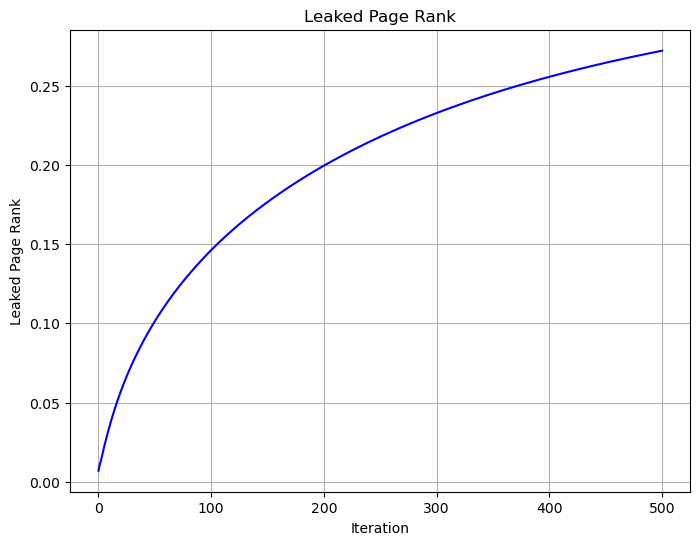

In [23]:
def cal_leaked_score(M, max_iterations=1000, ep=0.02):
    node_count = M.shape[0]
    r = np.ones(node_count) / node_count
    leaked_scores = []

    for iter_num in range(max_iterations):
        new_r = M.dot(r)
        score = 1 - new_r.sum()
        leaked_scores.append(score)
        
        if np.linalg.norm(new_r - r, ord=1) < ep:
            break  # Exit the loop when the stopping criterion is met
        
        r = new_r

    return leaked_scores

leaked_scores = cal_leaked_score(adj_matrix.tocsr())

plt.figure(figsize=(8,6))
plt.plot(leaked_scores, color='blue')
plt.title('Leaked Page Rank')
plt.xlabel('Iteration')
plt.ylabel('Leaked Page Rank')
plt.grid(True)
plt.show()

From the graph, we can see that there is a gradual increase in the leaked page rank. We observe that in the initial state all nodes possess an equal PageRank. Consequently, in the initial iterations, dead-end nodes rapidly accumulate PageRank, resulting in a significant increase in leaked PageRank. At end of the iterative process, as PageRank in the "non-dead-end" nodes approaches a stable state, the flow of PageRank to dead-end nodes diminishes. Consequently, this leads to reduced increments in the graph and a tapering-off effect in the leakage of PageRank.

**Task 3: Implementation of Power Iteration with Teleport**

(A) Extend your PageRank code to handle both spider traps and dead ends using the idea of teleport. In this task, your implementation will allow to teleport randomly to
any node. Code the PageRank with teleport formulation that, using the sparse matrix M, for each iteration works in three steps (slide 8 of W6.3 lecture notes).

In [24]:
def pagerank_with_teleport(M,max_iterations=1000, beta=0.9, ep=0.02):
    node_count = M.shape[0]
    r = np.ones(node_count) / node_count

    for iter_num in range(max_iterations):
        #Calculate ranks of current iteration with beta
        new_r = beta * M.dot(r)
        
        #Caluclate constant S for teleport
        S = np.sum(new_r)
        
        #Update new rank r with teleport
        new_r += (1 - S) / node_count
        
        if np.linalg.norm(new_r - r, ord=1) < ep:
            break  
        
        r = new_r

    return new_r,iter_num + 1

(B) Run your code on the Berkeley-Stanford web data to calculate the rank score for all the nodes. Report: (1) The running time; (2) The number of iterations needed to stop; (3) The IDs and scores of the top-10 ranked nodes.

In [25]:
start_time = time.time()

# Calculate PageRank scores using the pagerank_with_teleport function
teleport_pagerank_scores, iterations = pagerank_with_teleport(adjacency_matrix.tocsr())

end_time = time.time()

# Calculate the running time
running_time = end_time - start_time

# Sort the nodes by their PageRank scores and retrieve the top-10 ranked nodes
top_10_nodes = pd.Series(teleport_pagerank_scores).nlargest(10)

print(f"Running time of the power iteration algorithm: {running_time} seconds")
print(f"Number of iterations: {iterations}.")
print("Top 10 ranked nodes and their scores:")
print(top_10_nodes)

Running time of the power iteration algorithm: 1.5785479545593262 seconds
Number of iterations: 12.
Top 10 ranked nodes and their scores:
272918    0.009991
438237    0.007288
210375    0.004514
210304    0.004406
601655    0.003995
571447    0.003663
316791    0.003087
571446    0.002320
319208    0.002236
184093    0.002232
dtype: float64


(C) Vary the teleport probability β with numbers in the set: {1, 0.9, 0.8, 0.7, 0.6}. Report the number of iterations needed to stop for each β. Explain, in words, your findings from this experiment.

In [26]:
beta_set = [1, 0.9, 0.8, 0.7, 0.6]
iterations = []

for beta in beta_set:
    _, itr = pagerank_with_teleport(adjacency_matrix.tocsr(), beta=beta)
    iterations.append(itr)

for beta, itr in zip(beta_set, iterations):
    print(f"For β = {beta}, iterations are {itr}.")


For β = 1, iterations are 520.
For β = 0.9, iterations are 12.
For β = 0.8, iterations are 8.
For β = 0.7, iterations are 6.
For β = 0.6, iterations are 5.


When β is set to 1 (no teleportation), the algorithm required the highest number of iterations (520) to converge. This behavior is expected because teleportation is entirely disabled, and the algorithm relies solely on the link structure of the graph. As β is gradually decreased, the number of iterations required for convergence significantly decreases. This is because teleportation allows the algorithm to "jump" to different parts of the graph, aiding in faster convergence. When β is reduced to 0.6, the algorithm converges in just 5 iterations. Decreasing the teleport probability (β) leads to faster convergence of the PageRank algorithm. 